# Summaries



In [156]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import numpy as np

warnings.filterwarnings('ignore')

In [157]:
# Import dataframe
df_main = pd.read_csv('Resources/nyc_bakeries_aggregated.csv', index_col='Unnamed: 0')
df_main['phone'] = df_main['phone'].apply(lambda x: False if pd.isna(x) else True)

# Convert phone and display phone to bools
df_main['display_phone'] = df_main['display_phone'].apply(lambda x: False if pd.isna(x) else True)
# Convert price into numerical values
df_main['price'] = df_main['price'].replace({'$': 1., 
                                             '$$': 2.,
                                             '$$$': 3.,
                                             '$$$$' : 4.,
                                             '$$$$$' : 5.})
df_main.head()

,id,name,review_count,category,rating,phone,display_phone,price,coord_lat,coord_long
0,epvSBt9LldIgyc08f8nIAw,La Bicyclette Bakery,3,bakeries,4.5,False,False,NaN,40.683587,-73.995090
2,-k_5NsYnKCHGTdBaqegkrw,Le Fournil,118,bakeries,4.5,False,False,2.0,40.727947,-73.988489
4,0kW0112jMERVjpRzWT4F7Q,La Bicyclette Bakery,84,bakeries,5.0,True,True,NaN,40.714400,-73.959110
6,XSwagBljEsxG2i1rq4GEAQ,Almondine Bakery,404,bakeries,4.0,True,True,2.0,40.703317,-73.991251
8,fPQ2eE9lm8tc87O5-GLjyA,Mille-Feuille Bakery,441,coffee,4.5,True,True,2.0,40.782425,-73.981160


In [158]:
# Top Ranking Business Categories in Dessert Cohort
df_category_rankings = df_main.category.value_counts().reset_index()
df_category_rankings.head()

,category,count
0,bakeries,1145
1,coffee,861
2,desserts,656
3,breakfast&brunch,295
4,cafes,264


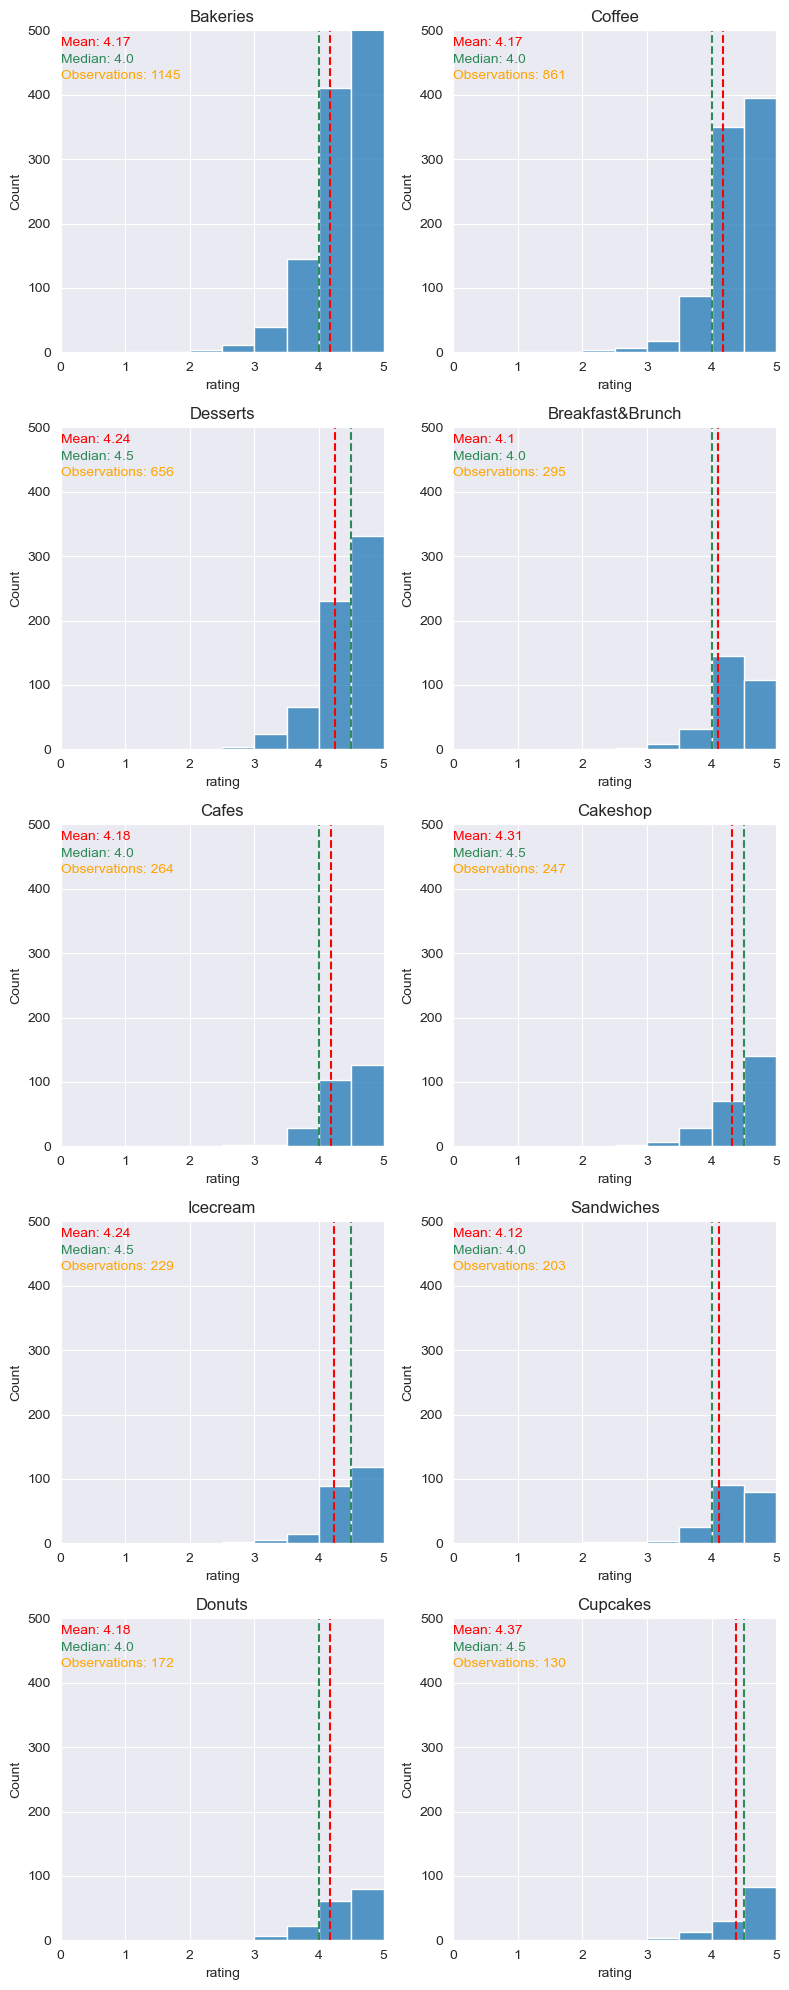

In [333]:
# Summaries
num_businesses = df_main.id.nunique()
total_reviews = df_main.review_count.sum()
df_main.category.value_counts()

# Plot business types
    # Generate Figure
fig, ax = plt.subplots(5, 2, figsize=(8, 20))

    # Define categories of interest -- top 10 categories
categories = df_category_rankings.iloc[:10,:].category

    # Flatten 2D array and iterate through it along with the categories and titles
for axis, category, title in zip(ax.flatten(), categories, [cat.title() for cat in categories]):
    axis.set_title(title)
    sns.histplot(data=df_main[df_main['category'] == category].rating, ax=axis, binwidth=0.5, bins=10)
    axis.axvline(df_main[df_main['category'] == category].rating.mean(), linestyle='dashed', color='red')
    axis.axvline(df_main[df_main['category'] == category].rating.median(), linestyle='dashed', color='seagreen')
    axis.text(0, 475, f"Mean: {round(df_main[df_main['category'] == category]['rating'].mean(), 2)}", color='red')
    axis.text(0, 450, f"Median: {round(df_main[df_main['category'] == category]['rating'].median(), 2)}", color='seagreen')
    axis.text(0, 425, f"Observations: {len(round(df_main[df_main['category'] == category], 2))}", color='orange')

# Set chart limits
for r in range(5):
    for c in range(2): 
        ax[r, c].set_ylim(0, 500)
        ax[r, c].set_xlim(0, 5)
        
plt.tight_layout()
plt.show()

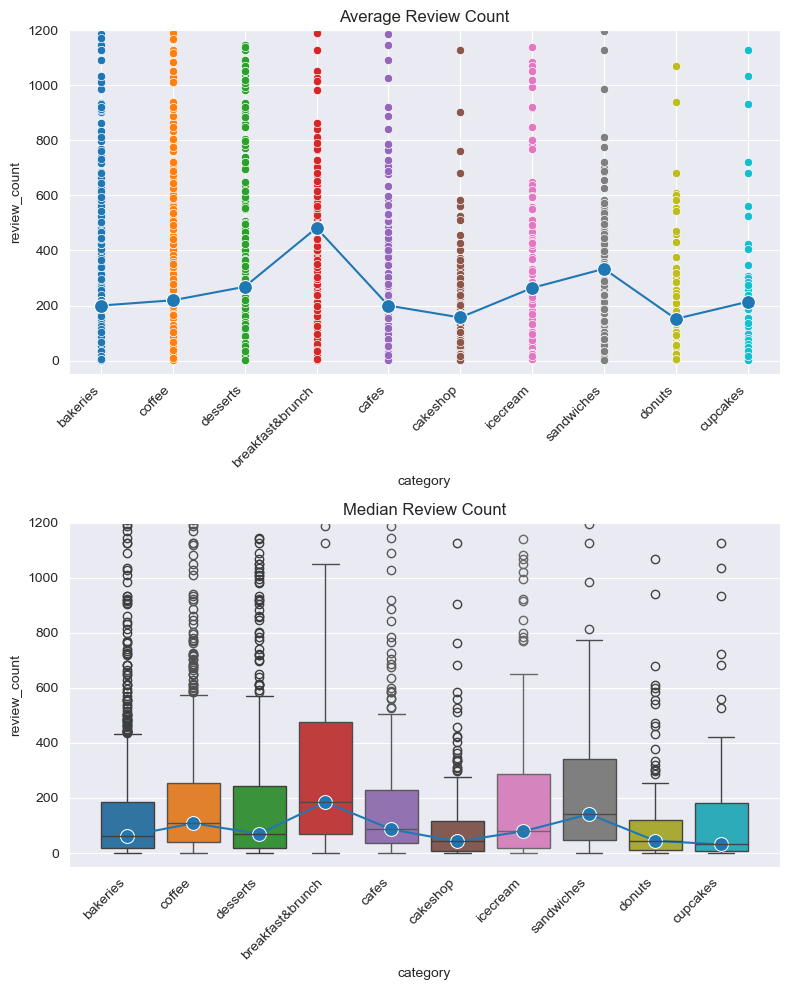

In [160]:
# Plot review counts
# Figure
fig1,ax1 = plt.subplots(2,1, figsize=(8,10))

review_count_means = []
review_count_medians = []

# Graph Loop
for category in categories:
    # Generate scatterplot for each business vs review_count
    sns.scatterplot(data=df_main[df_main['category'] == category], x='category', y='review_count', ax=ax1[0])
        # Add title and set y limits
    ax1[0].set_title("Average Review Count")
    ax1[0].set_ylim(-50, 1200)
    # Create box plot as second plot
    sns.boxplot(data=df_main[df_main['category'] == category], x='category', y='review_count', ax=ax1[1])
        # Add title and limits
    ax1[1].set_title("Median Review Count")
    ax1[1].set_ylim(-50, 1200)
    # Rotate xtick labels on x-axis
    ax1[1].set_xticklabels(categories, rotation=45, ha='right')
    ax1[0].set_xticklabels(categories, rotation=45, ha='right')
    # Calculate mean and medians for respective category
    review_count_means.append(df_main[df_main['category'] == category].review_count.mean())
    review_count_medians.append(df_main[df_main['category'] == category].review_count.median())
    
# Overlay line plot on top of scatter and box charts to visualize median and mean
sns.lineplot(review_count_means, marker='o', markersize=10, ax=ax1[0])
sns.lineplot(review_count_medians, marker='o', markersize=10, ax=ax1[1])

plt.tight_layout()
plt.show()

Text(0, 1400, 'Intercept: 70.78')

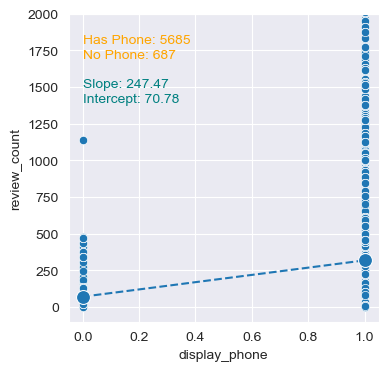

In [161]:
# Phone number comparison, does having a phone number affect business traffic?
# Generate subplot
fig2,ax2 = plt.subplots(figsize=(4,4))
    # Unsampled
        # Add scatterplot of having phone vs not having phone
sns.scatterplot(data=df_main, x='display_phone', y='review_count', ax=ax2)
        # Define populations
has_phone_df = df_main[df_main['display_phone'] == True]
no_phone_df = df_main[df_main['display_phone'] == False]
        # Mean value of True False values
review_count_means_w_phone = [no_phone_df.review_count.mean(), has_phone_df.review_count.mean()]
sns.lineplot(review_count_means_w_phone, marker='o', markersize=10, linestyle='--', ax=ax2)
        # Add observations
ax2.text(0, 1800, f"Has Phone: {len(has_phone_df)}", color='orange')
ax2.text(0, 1700, f"No Phone: {len(no_phone_df)}", color='orange')
        # Add y-limit 
ax2.set_ylim(-100,2000)

# Get Slope
import statsmodels.api as sm
phone_model = sm.OLS.from_formula('review_count ~ display_phone', data=df_main)
phone_params = phone_model.fit().params
ax2.text(0, 1500, f"Slope: {round(phone_params[1], 2)}", color='teal')
ax2.text(0, 1400, f"Intercept: {round(phone_params[0], 2)}", color='teal')


CRS of gdf: EPSG:2263
CRS of nyc_map: EPSG:2263


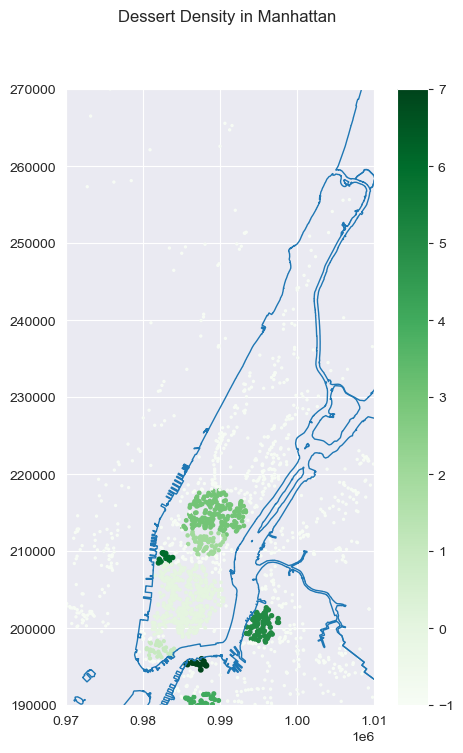

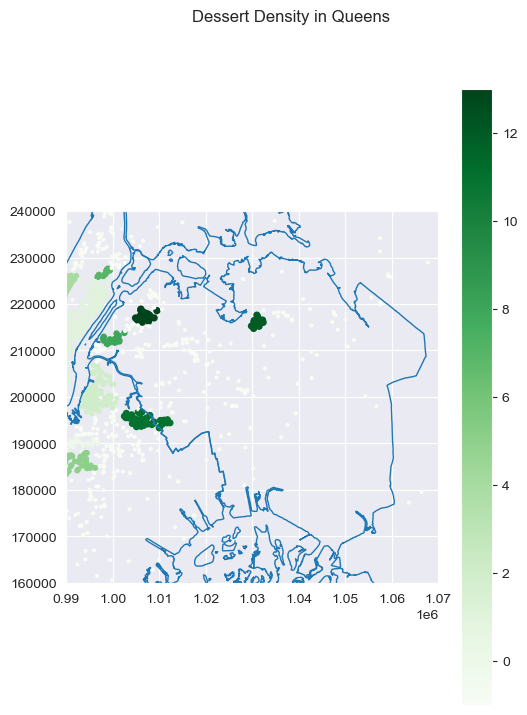

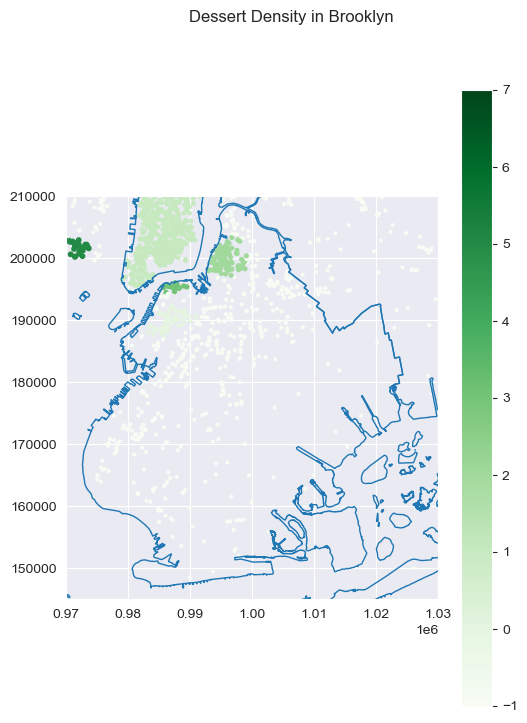

In [332]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import geopandas as gpd

# Remove rows with missing latitude or longitude
df_main_dup_drop = df_main.drop_duplicates('id', inplace=False)
geo_data = df_main_dup_drop[['coord_lat', 'coord_long']].dropna()

# Standardize the latitude and longitude data
scaler = StandardScaler()
geo_data_scaled = scaler.fit_transform(geo_data)

# DBscans
dbscan_manhattan = DBSCAN(eps=0.02, min_samples=22)
clusters_manhattan = dbscan_manhattan.fit_predict(geo_data_scaled)
dbscan_qns = DBSCAN(eps=0.03, min_samples=15)
clusters_qns = dbscan_qns.fit_predict(geo_data_scaled)
dbscan_bk = DBSCAN(eps=0.025, min_samples=20)
clusters_bk = dbscan_bk.fit_predict(geo_data_scaled)


# Add cluster labels back to the original DataFrame
geo_data['cluster_man'] = clusters_manhattan
geo_data['cluster_qns'] = clusters_qns
geo_data['cluster_bk'] = clusters_bk
df_main_dup_drop['cluster_man'] = geo_data['cluster_man']
df_main_dup_drop['cluster_qns'] = geo_data['cluster_qns']
df_main_dup_drop['cluster_bk'] = geo_data['cluster_bk']

# Load nyc map
nyc_map = gpd.read_file(gpd.datasets.get_path('nybb'))

# Create a GeoDataFrame with the clustered data
gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.coord_long, geo_data.coord_lat))
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(nyc_map.crs)

# Confirm reference system
print("CRS of gdf:", gdf.crs)
print("CRS of nyc_map:", nyc_map.crs)

# Plot clusters per borough
fig4, ax4 = plt.subplots(figsize=(6, 8))
nyc_map.boundary.plot(ax=ax4, linewidth=1)
gdf.plot(column='cluster_man', legend=True, ax=ax4, markersize=clusters_manhattan + 3, cmap='Greens')
ax4.set_xlim(0.97e6, 1.01e6)
ax4.set_ylim(190000, 270000)
fig4.suptitle("Dessert Density in Manhattan")

fig5, ax5 = plt.subplots(figsize=(6, 8))
nyc_map.boundary.plot(ax=ax5, linewidth=1)
gdf.plot(column='cluster_qns', legend=True, ax=ax5, markersize=clusters_qns + 5, cmap='Greens')
ax5.set_xlim(0.99e6, 1.07e6)
ax5.set_ylim(160000, 240000)
fig5.suptitle("Dessert Density in Queens")

fig6, ax6 = plt.subplots(figsize=(6, 8))
nyc_map.boundary.plot(ax=ax6, linewidth=1)
gdf.plot(column='cluster_bk', legend=True, ax=ax6, markersize=clusters_bk + 5, cmap='Greens')
ax6.set_xlim(0.97e6, 1.03e6)
ax6.set_ylim(145000, 210000)
fig6.suptitle("Dessert Density in Brooklyn")
plt.show()

In [ ]:
# DBscan
clusters = dbscan.fit_predict(geo_data_scaled)
# Add cluster labels back to the original DataFrame
geo_data['cluster'] = clusters
df_main_dup_drop['cluster'] = geo_data['cluster']
# Step 4: Visualize Clusters
# Load a base map of New York City
nyc_map = gpd.read_file(gpd.datasets.get_path('nybb'))

# Create a GeoDataFrame with the clustered data
gdf = gpd.GeoDataFrame(geo_data, geometry=gpd.points_from_xy(geo_data.coord_long, geo_data.coord_lat))
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(nyc_map.crs)

# Confirm reference system
print("CRS of gdf:", gdf.crs)
print("CRS of nyc_map:", nyc_map.crs)

# Plot the clusters on the map
fig4, ax4 = plt.subplots(figsize=(12, 16))
nyc_map.boundary.plot(ax=ax4, linewidth=1)
gdf.plot(column='cluster', legend=True, ax=ax4, markersize=5, cmap='Greens')
ax4.set_xlim(0.97e6, 1.01e6)
ax4.set_ylim(190000, 270000)
fig4.suptitle("Dessert Density in Manhattan")

In [190]:
# Calculate average rating and review count for each cluster, excluding the noise cluster labeled as -1
cluster_analysis = df_main_dup_drop.loc[geo_data['cluster'] != -1].groupby('cluster').agg({'rating': 'mean', 'review_count': 'mean'}).reset_index()
cluster_analysis

,cluster,rating,review_count
0,0,4.187750,290.790502
1,1,4.166667,134.307692
